# Visualización de datos: práctica y ejercicios

por [Manuel López Sheriff](https://www.linkedin.com/in/sheriff-data/)

**NOTAS**
 - Hay muchas formas de resolver cada problema, encuentra la tuya.
 - Crea las celdas extra que necesites.
 - Recuerda que una celda puede ser de tipo Código, o de tipo Markdown. Utiliza las segundas para escribir texto y explicaciones si lo precisas.
 - Intenta crear variables a la hora de resolver los ejercicios.
 - Puedes apoyarte en internet: todos los programadores lo hacemos a diario.

Importamos la librería `seaborn`

Importamos el dataset *tips* (propinas, en inglés): cada fila es una mesa atendida en un restaurante

In [1]:
import seaborn as sns

In [2]:
df = sns.load_dataset("tips")

In [4]:
df.shape

(244, 7)

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


columnas:
 * 'total_bill': total mesa
 * 'tip': propina
 * 'sex': sexo de quien paga
 * 'smoker': mesa fumadora o no
 * 'day': día de la semana
 * 'time': comida o cena
 * 'size': número de comensales

 - Intenta dar solución tanto analítica como gráfica a las preguntas
 - Intenta utilizar colores apropiados y coherentes durante la resolución de los ejercicios

In [6]:
df.sample(5)

,total_bill,tip,sex,smoker,day,time,size
167,31.71,4.50,Male,No,Sun,Dinner,4
156,48.17,5.00,Male,No,Sun,Dinner,6
134,18.26,3.25,Female,No,Thur,Lunch,2
38,18.69,2.31,Male,No,Sat,Dinner,3
190,15.69,1.50,Male,Yes,Sun,Dinner,2


Qué día de la semana se sirven más mesas?

In [8]:
df.day.value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

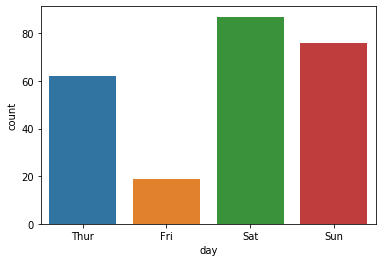

In [11]:
sns.countplot(x=df.day)

Se fuma más los fines de semana?

In [18]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [23]:
df["is_weekend"] = df.day.isin(["Sat", "Sun"])

In [29]:
import pandas as pd

In [34]:
pd.crosstab(df.smoker, df.is_weekend, normalize='columns').round(3)

is_weekend,False,True
smoker,,
Yes,0.395,0.374
No,0.605,0.626


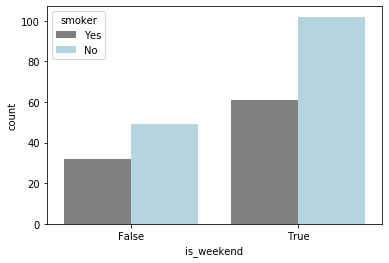

In [38]:
sns.countplot(hue=df.smoker, x=df.is_weekend, palette=["gray", "lightblue"])

No parece significativa la diferencia

Se fuma más en la cena que en la comida?

In [40]:
pd.crosstab(df.smoker, df.time, normalize='columns').round(3)

time,Lunch,Dinner
smoker,,
Yes,0.338,0.398
No,0.662,0.602


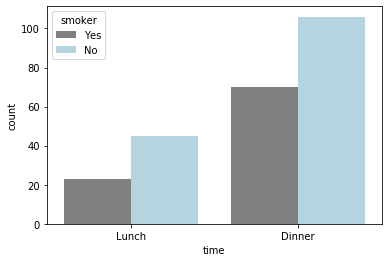

In [41]:
sns.countplot(hue=df.smoker, x=df.time, palette=["gray", "lightblue"])

No parece significativa la diferencia

Qué día de la semana se sirven más cenas?

In [42]:
df_cenas = df[df.time == "Dinner"].copy()

In [43]:
df_cenas.shape

(176, 8)

In [44]:
df_cenas.day.value_counts()

Sat     87
Sun     76
Fri     12
Thur     1
Name: day, dtype: int64

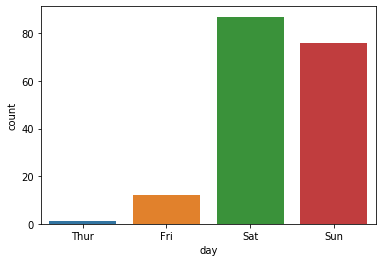

In [45]:
sns.countplot(x=df_cenas.day)

Qué días de la semana pagan más las mujeres que los hombres?

In [50]:
pd.crosstab(df.sex, df.day, normalize='columns').round(3)

day,Thur,Fri,Sat,Sun
sex,,,,
Male,0.484,0.526,0.678,0.763
Female,0.516,0.474,0.322,0.237


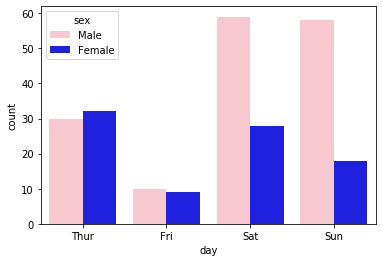

In [52]:
sns.countplot(hue=df.sex, x=df.day, palette=["pink", "blue"])

Los fumadores gastan más de media en sus mesas?

In [68]:
df.groupby("smoker").total_bill.mean().round(1)

smoker
Yes    20.8
No     19.2
Name: total_bill, dtype: float64

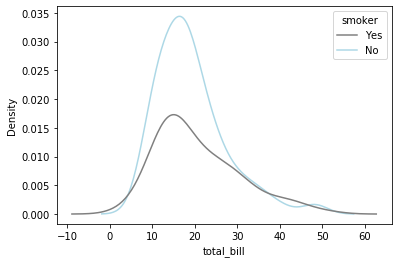

In [66]:
sns.kdeplot(x=df.total_bill, hue=df.smoker, palette=["gray", "lightblue"])

Qué día de la semana se gasta más dinero?

In [70]:
df.groupby("day").total_bill.mean().round(1)

day
Thur    17.7
Fri     17.2
Sat     20.4
Sun     21.4
Name: total_bill, dtype: float64

In [75]:
df.groupby("day").total_bill.sum().round(-1)

day
Thur    1100.0
Fri      330.0
Sat     1780.0
Sun     1630.0
Name: total_bill, dtype: float64

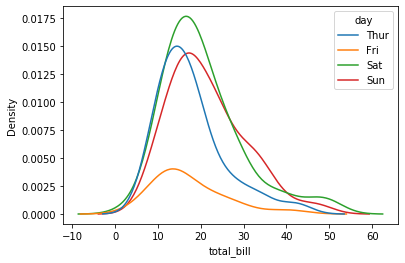

In [76]:
sns.kdeplot(x=df.total_bill, hue=df.day)

Las mesas son más grandes los días de fin de semana?

In [95]:
df.groupby("is_weekend")["size"].mean().round(2).sort_values()

is_weekend
False    2.37
True     2.67
Name: size, dtype: float64

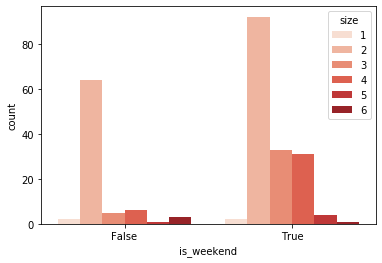

In [92]:
sns.countplot(x=df.is_weekend, hue=df["size"], palette="Reds")

Las mesas son más grandes a la hora de la cena?

In [96]:
df.groupby("time")["size"].mean().round(2).sort_values()

time
Lunch     2.41
Dinner    2.63
Name: size, dtype: float64

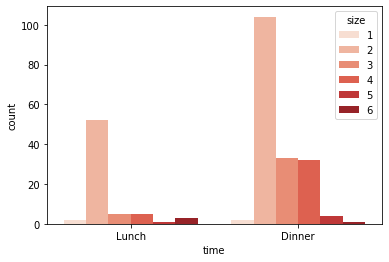

In [97]:
sns.countplot(x=df.time, hue=df["size"], palette="Reds")

Se gasta más a la hora de comer o de cenar?

In [104]:
df.groupby("time").total_bill.mean().round(1)

time
Lunch     17.2
Dinner    20.8
Name: total_bill, dtype: float64

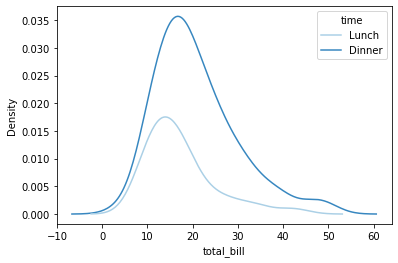

In [113]:
sns.kdeplot(x=df.total_bill, hue=df.time, palette="Blues")

Se gasta más los fines de semana?

In [109]:
df.groupby("is_weekend").total_bill.mean().round(1)

is_weekend
False    17.6
True     20.9
Name: total_bill, dtype: float64

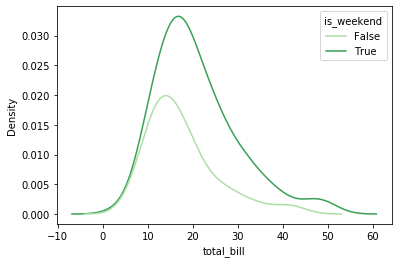

In [111]:
sns.kdeplot(x=df.total_bill, hue=df.is_weekend, palette="Greens")

Cómo se relaciona el número de comensales con el precio total?

In [121]:
df.groupby("size").total_bill.mean().round(1)

size
1     7.2
2    16.4
3    23.3
4    28.6
5    30.1
6    34.8
Name: total_bill, dtype: float64

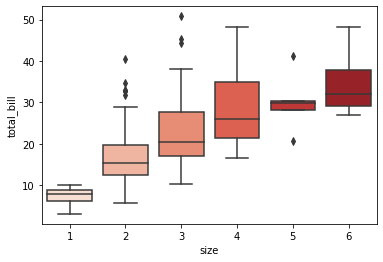

In [132]:
sns.boxplot(y=df.total_bill, x=df["size"], palette="Reds")

In [124]:
df["total_bill_per_comensal"] = (df.total_bill / df["size"]).round(2)

In [125]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,is_weekend,total_bill_per_comensal
0,16.99,1.01,Female,No,Sun,Dinner,2,True,8.49
1,10.34,1.66,Male,No,Sun,Dinner,3,True,3.45
2,21.01,3.50,Male,No,Sun,Dinner,3,True,7.00
3,23.68,3.31,Male,No,Sun,Dinner,2,True,11.84
4,24.59,3.61,Female,No,Sun,Dinner,4,True,6.15


In [133]:
df.groupby("size").total_bill_per_comensal.median().round(1)

size
1    7.9
2    7.7
3    6.8
4    6.5
5    6.0
6    5.3
Name: total_bill_per_comensal, dtype: float64

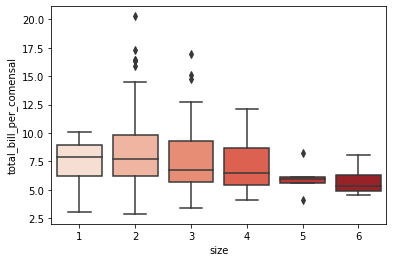

In [131]:
sns.boxplot(y=df.total_bill_per_comensal, x=df["size"], palette="Reds")

Es la gente más generosa con las propinas en las cenas?

In [140]:
df["perc_tip"] = (df.tip / df.total_bill * 100).round()

In [141]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,is_weekend,total_bill_per_comensal,perc_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,True,8.49,6.0
1,10.34,1.66,Male,No,Sun,Dinner,3,True,3.45,16.0
2,21.01,3.50,Male,No,Sun,Dinner,3,True,7.00,17.0
3,23.68,3.31,Male,No,Sun,Dinner,2,True,11.84,14.0
4,24.59,3.61,Female,No,Sun,Dinner,4,True,6.15,15.0


In [143]:
df.sort_values("perc_tip", ascending=False).head()

,total_bill,tip,sex,smoker,day,time,size,is_weekend,total_bill_per_comensal,perc_tip
172,7.25,5.15,Male,Yes,Sun,Dinner,2,True,3.62,71.0
178,9.60,4.00,Female,Yes,Sun,Dinner,2,True,4.80,42.0
67,3.07,1.00,Female,Yes,Sat,Dinner,1,True,3.07,33.0
232,11.61,3.39,Male,No,Sat,Dinner,2,True,5.80,29.0
109,14.31,4.00,Female,Yes,Sat,Dinner,2,True,7.16,28.0


In [146]:
df.groupby("time").perc_tip.median()

time
Lunch     15.0
Dinner    16.0
Name: perc_tip, dtype: float64

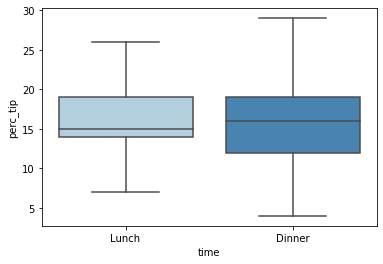

In [155]:
sns.boxplot(y=df.perc_tip, x=df.time, palette="Blues", showfliers=False)

Es la gente más generosa con las propinas los fines de semana?

In [156]:
df.groupby("is_weekend").perc_tip.median()

is_weekend
False    15.0
True     16.0
Name: perc_tip, dtype: float64

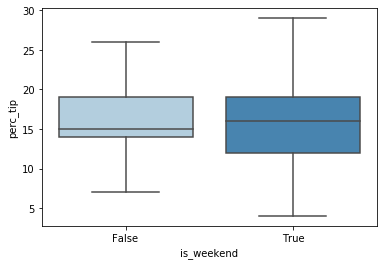

In [157]:
sns.boxplot(y=df.perc_tip, x=df.is_weekend, palette="Blues", showfliers=False)

Son más generosos los hombres?

In [159]:
df.groupby("sex").perc_tip.median()

sex
Male      15.0
Female    16.0
Name: perc_tip, dtype: float64

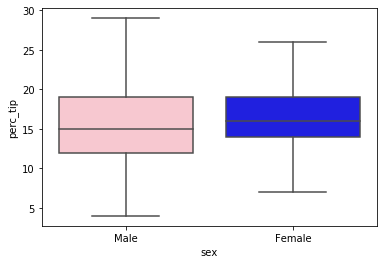

In [164]:
sns.boxplot(y=df.perc_tip, x=df.sex, showfliers=False, palette=["pink", "blue"])

Están correlacionados precio total y propina?

In [166]:
df.corr()

,total_bill,tip,size,is_weekend,total_bill_per_comensal,perc_tip
total_bill,1.000000,0.675734,0.598315,0.176770,0.647554,-0.334753
tip,0.675734,1.000000,0.489299,0.120198,0.347405,0.343895
size,0.598315,0.489299,1.000000,0.148022,-0.175359,-0.141157
is_weekend,0.176770,0.120198,0.148022,1.000000,0.072160,-0.024813
total_bill_per_comensal,0.647554,0.347405,-0.175359,0.072160,1.000000,-0.313220
perc_tip,-0.334753,0.343895,-0.141157,-0.024813,-0.313220,1.000000


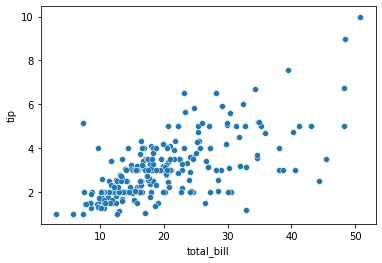

In [168]:
sns.scatterplot(x=df.total_bill, y=df.tip)

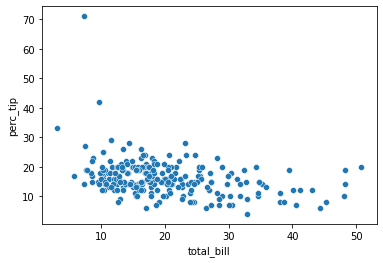

In [169]:
sns.scatterplot(x=df.total_bill, y=df.perc_tip)

Están correlacionados precio total y número de comensales?

In [172]:
df.corr()

,total_bill,tip,size,is_weekend,total_bill_per_comensal,perc_tip
total_bill,1.000000,0.675734,0.598315,0.176770,0.647554,-0.334753
tip,0.675734,1.000000,0.489299,0.120198,0.347405,0.343895
size,0.598315,0.489299,1.000000,0.148022,-0.175359,-0.141157
is_weekend,0.176770,0.120198,0.148022,1.000000,0.072160,-0.024813
total_bill_per_comensal,0.647554,0.347405,-0.175359,0.072160,1.000000,-0.313220
perc_tip,-0.334753,0.343895,-0.141157,-0.024813,-0.313220,1.000000


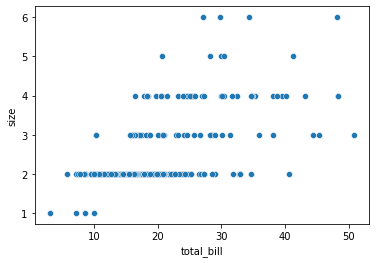

In [176]:
sns.scatterplot(x=df.total_bill, y=df["size"])

In [178]:
df.corr()

,total_bill,tip,size,is_weekend,total_bill_per_comensal,perc_tip
total_bill,1.000000,0.675734,0.598315,0.176770,0.647554,-0.334753
tip,0.675734,1.000000,0.489299,0.120198,0.347405,0.343895
size,0.598315,0.489299,1.000000,0.148022,-0.175359,-0.141157
is_weekend,0.176770,0.120198,0.148022,1.000000,0.072160,-0.024813
total_bill_per_comensal,0.647554,0.347405,-0.175359,0.072160,1.000000,-0.313220
perc_tip,-0.334753,0.343895,-0.141157,-0.024813,-0.313220,1.000000


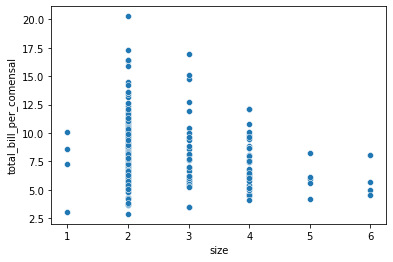

In [179]:
sns.scatterplot(y=df.total_bill_per_comensal, x=df["size"])

Haz un gráfico de tu elección con 2 variables numéricas y 2 categóricas (pista: usa `hue` y `style`). Te resulta útil?

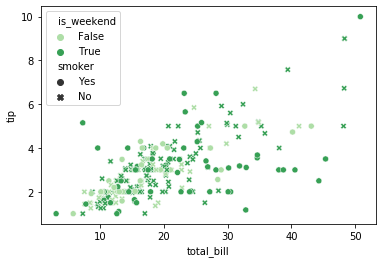

In [185]:
sns.scatterplot(x=df.total_bill, y=df.tip, hue=df.is_weekend, palette="Greens", style=df.smoker)